In [11]:

import pandas as pd
import os
import random
from random import choice
import numpy as np

import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#from surprise import Reader, Dataset, SVD, evaluate
sns.set_style("ticks")



In [9]:
!pip install surprise

     ------------------------------------ 772.0/772.0 KB 275.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using legacy 'setup.py install' for scikit-surprise, since package 'wheel' is not installed.
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Running setup.py install for scikit-surprise did not run successfully.
  │ exit code: 1
  ╰─> [50 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\surprise
      copying surprise\accuracy.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\builtin_datasets.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dump.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\reader.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\trainset.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\utils.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\__init__.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\__main__.py -> build\lib.win-amd64-3.10\surprise
      creating buil

In [2]:
data = pd.read_csv('attraction_reviews.csv')

In [4]:
data.head()

,image_user,name_user,info_user,type_review,date_review,text_review,score_user,attraction_id
0,https://dynamic-media-cdn.tripadvisor.com/medi...,bucketlisttravel,"Saint Paul, MN11 contributions",So lively!!,"January 6, 2024",Lively people. Happy kids. Beautiful skyline. ...,5.0,0
1,https://dynamic-media-cdn.tripadvisor.com/medi...,WPLandry,"Fairfax, VA545 contributions",Beautiful & spacious,"January 6, 2024",Central Park is an amazing escape from the bus...,5.0,0
2,https://dynamic-media-cdn.tripadvisor.com/medi...,Rumzzz,"Irving, TX77 contributions",Spectacular,"January 6, 2024",One can never get enough of Central Park - the...,5.0,0
3,https://dynamic-media-cdn.tripadvisor.com/medi...,A Ruiz,"Lahaina, HI56 contributions",Awesome experience!,"December 30, 2023",Carriage ride around the park with historical ...,5.0,0
4,https://dynamic-media-cdn.tripadvisor.com/medi...,BeakerTX,"San Antonio, TX572 contributions",It's a park!,"December 28, 2023",Nice family stroll through the southern part o...,5.0,0


In [24]:
data.info

<bound method DataFrame.info of                                               image_user         name_user  \
0      https://dynamic-media-cdn.tripadvisor.com/medi...  bucketlisttravel   
1      https://dynamic-media-cdn.tripadvisor.com/medi...          WPLandry   
2      https://dynamic-media-cdn.tripadvisor.com/medi...            Rumzzz   
3      https://dynamic-media-cdn.tripadvisor.com/medi...            A Ruiz   
4      https://dynamic-media-cdn.tripadvisor.com/medi...          BeakerTX   
...                                                  ...               ...   
12694  https://dynamic-media-cdn.tripadvisor.com/medi...            nypuck   
12695  https://dynamic-media-cdn.tripadvisor.com/medi...           Carol K   
12696  https://dynamic-media-cdn.tripadvisor.com/medi...           Pili_12   
12697  https://dynamic-media-cdn.tripadvisor.com/medi...         LazyPoint   
12698  https://dynamic-media-cdn.tripadvisor.com/medi...   yourtravelchick   

                               

In [5]:
data.columns

Index(['image_user', 'name_user', 'info_user', 'type_review', 'date_review',
       'text_review', 'score_user', 'attraction_id'],
      dtype='object')

In [8]:
data.isnull().sum()

image_user       1167
name_user           0
info_user           0
type_review         0
date_review         0
text_review         0
score_user          0
attraction_id       0
dtype: int64

In [22]:
data.shape

(12699, 8)

In [16]:
for item in data.columns:
    print(f'item:', item,',',type(data[item][0]))

item: image_user , <class 'str'>
item: name_user , <class 'str'>
item: info_user , <class 'str'>
item: type_review , <class 'str'>
item: date_review , <class 'str'>
item: text_review , <class 'str'>
item: score_user , <class 'numpy.float64'>
item: attraction_id , <class 'numpy.int64'>


In [19]:
data.nunique()

image_user        3631
name_user         8805
info_user         7658
type_review      10985
date_review       2996
text_review      12393
score_user           5
attraction_id      101
dtype: int64

In [26]:

np.sort(data['score_user'].unique())

array([1., 2., 3., 4., 5.])

In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [33]:
model_name = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json: 100%|██████████| 338/338 [00:00<00:00, 168kB/s]
c:\Users\Michel\scrap\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Michel\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
vocab.txt: 100%|███████

In [53]:
def infrerence(text):
    try:
        inputs = tokenizer(text, return_tensors="pt")
        outputs = model(**inputs)
        return torch.argmax(outputs.logits, dim=1).item()
    except:
        try:
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            return torch.argmax(outputs.logits, dim=1).item()
        except:
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            return torch.argmax(outputs.logits, dim=1).item()



In [59]:
infrerence("Very well done. Very sad but something we all must go and see and remember the innocent people and brave first responders that died for no reason, except for pure evil and hatred.")

0

In [55]:
data['sentiment_labels'] = data['text_review'].apply(infrerence)

In [57]:
data['sentiment_labels']

0        2
1        2
2         
3        2
4        2
        ..
12694    2
12695    1
12696    2
12697    2
12698    2
Name: sentiment_labels, Length: 12699, dtype: object

In [58]:
data.to_csv('data_sentiment.csv')

In [3]:
data_sentiment = pd.read_csv('data_sentiment.csv')

In [4]:
data_sentiment.head()

,Unnamed: 0,image_user,name_user,info_user,type_review,date_review,text_review,score_user,attraction_id,sentiment_labels
0,0,https://dynamic-media-cdn.tripadvisor.com/medi...,bucketlisttravel,"Saint Paul, MN11 contributions",So lively!!,"January 6, 2024",Lively people. Happy kids. Beautiful skyline. ...,5.0,0,2.0
1,1,https://dynamic-media-cdn.tripadvisor.com/medi...,WPLandry,"Fairfax, VA545 contributions",Beautiful & spacious,"January 6, 2024",Central Park is an amazing escape from the bus...,5.0,0,2.0
2,2,https://dynamic-media-cdn.tripadvisor.com/medi...,Rumzzz,"Irving, TX77 contributions",Spectacular,"January 6, 2024",One can never get enough of Central Park - the...,5.0,0,NaN
3,3,https://dynamic-media-cdn.tripadvisor.com/medi...,A Ruiz,"Lahaina, HI56 contributions",Awesome experience!,"December 30, 2023",Carriage ride around the park with historical ...,5.0,0,2.0
4,4,https://dynamic-media-cdn.tripadvisor.com/medi...,BeakerTX,"San Antonio, TX572 contributions",It's a park!,"December 28, 2023",Nice family stroll through the southern part o...,5.0,0,2.0


In [21]:
data_sentiment['attraction_id'].isnull().sum()

0

In [15]:
data_sentiment.groupby('score_user')['score_user'].agg(['count'])

,count
score_user,
1.0,320
2.0,288
3.0,836
4.0,2954
5.0,8301


In [27]:
data_sentiment.isnull().sum()[1]

C:\Users\Michel\AppData\Local\Temp\ipykernel_18800\2034617029.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_sentiment.isnull().sum()[1]


1167

In [22]:
data_sentiment['attraction_id'].count()

12699

C:\Users\Michel\AppData\Local\Temp\ipykernel_18800\3786331456.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


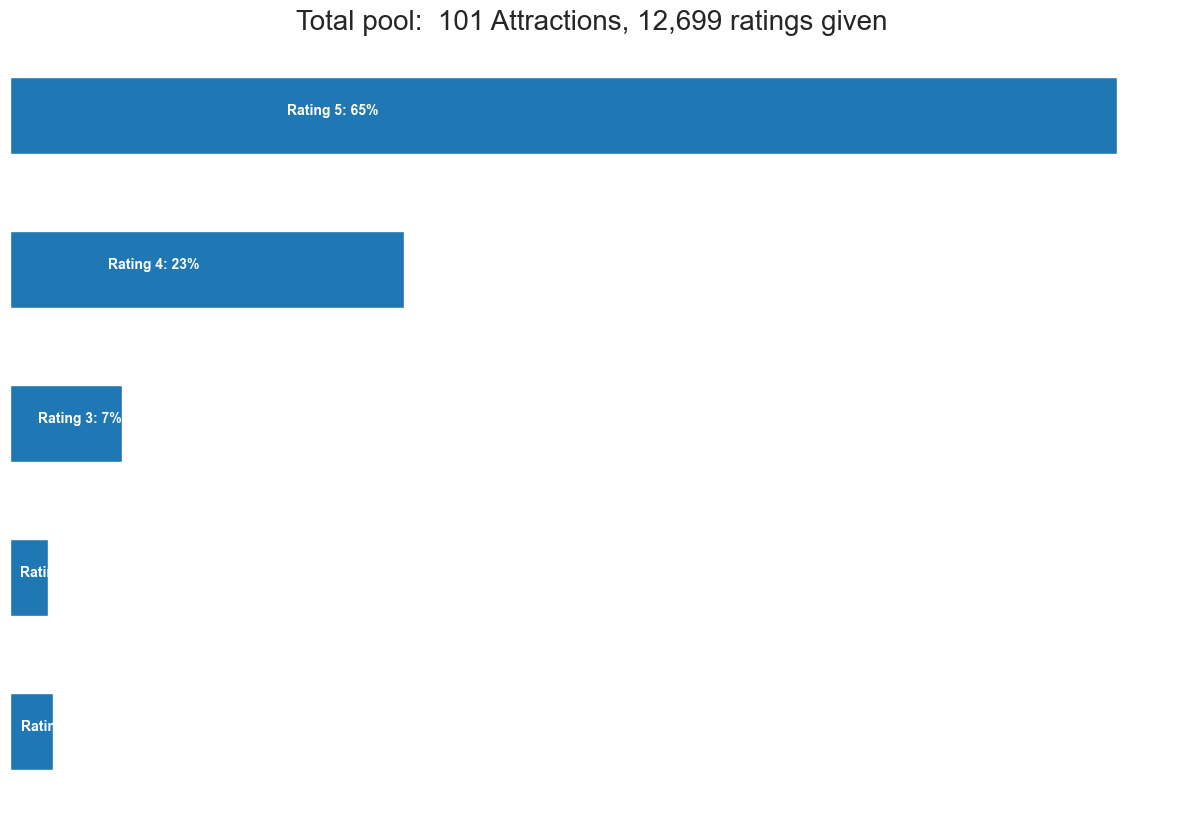

In [32]:
p = data_sentiment.groupby('score_user')['score_user'].agg(['count'])


# get Attraction count
cust_count = data_sentiment['attraction_id'].nunique() 

# get rating count
rating_count = data_sentiment['attraction_id'].count() 

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool:  {:,} Attractions, {:,} ratings given'.format(cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

On constate que la note tend à être relativement positive (>3). Cela peut être dû au fait que les clients mécontents ont tendance à partir au lieu de faire des efforts pour évaluer. Nous pouvons garder cela à l’esprit : les filattractionsms peu bien notés signifient qu’ils sont généralement très mauvais.

In [36]:
f = ['count','mean']

df_movie_summary = data_sentiment.groupby('attraction_id')['score_user'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.8),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))



Movie minimum times of review: 140.0


In [40]:
data_sentiment.groupby('attraction_id')['score_user'].agg(f)

,count,mean
attraction_id,,
0,110,4.709091
1,130,4.746154
2,150,4.513333
3,120,4.158333
4,120,4.650000
...,...,...
96,140,4.585714
97,130,4.184615
98,120,4.375000
